In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-27.659237654114754 -63.53189088748512
-48.5448851242825 -163.7211853870268
-7.748805427376098 -121.29804328368908
-76.62588248475488 84.65254653710127
53.23326287110456 17.241980130296525
22.177937288444014 45.75644095003122
24.713821938779702 -120.09252061834589
-86.92238019229906 116.10375746180421
-58.09692457536763 -133.441587877706
-40.979510319220736 -27.259981416578796
33.97829627414289 112.40605259998335
78.66703330891704 -60.02135432437528
-12.446614058735562 -173.84093778815154
51.96170760782027 131.496145944146
-88.53873397096899 -64.33076603307842
59.09213183449583 -24.58935721715676
3.7961083923177057 -11.957478870150481
8.021055305260646 69.11295330756505
-50.11220891601854 154.2401923208834
49.70206700585197 156.9166831328228
-73.60654141912883 28.75343695817932
-77.26465231237242 -99.13526574160869
-56.79346357904253 11.685325379655922
-55.418817667883644 57.5379689772318
23.294573594220054 -128.98253830439336
55.10285419467917 57.85757078618295
-38.73375941426315 82.6

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [7]:
import requests
requests.__version__


'2.28.1'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=380b949baadc69dacad99fa497f42584


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
# TW Should enumerate what is defined above/earlier in this coding.
# which is (cities) NOT city_data because it's declared empty[]. 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santiago del estero
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | zlotow
Processing Record 6 of Set 1 | riyadh
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | arraial do cabo
Processing Record 11 of Set 1 | luyang
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | falealupo
City not found. Skipping...
Processing Record 14 of Set 1 | stoyba
City not found. Skipping...
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | grindavik
Processing Record 17 of Set 1 | monrovia
Processing Record 18 of Set 1 | dhidhdhoo
Processing Record 19 of Set 1 | hobart
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | kruisfontein
Processing 

Processing Record 39 of Set 4 | kieta
Processing Record 40 of Set 4 | zatoka
Processing Record 41 of Set 4 | kedougou
Processing Record 42 of Set 4 | waipawa
Processing Record 43 of Set 4 | san patricio
Processing Record 44 of Set 4 | tiksi
Processing Record 45 of Set 4 | shirokiy
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | mrirt
City not found. Skipping...
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | padang
Processing Record 50 of Set 4 | saint-philippe
Processing Record 1 of Set 5 | namibe
Processing Record 2 of Set 5 | san jose
Processing Record 3 of Set 5 | cayenne
Processing Record 4 of Set 5 | bonavista
Processing Record 5 of Set 5 | bar harbor
Processing Record 6 of Set 5 | izberbash
Processing Record 7 of Set 5 | mahebourg
Processing Record 8 of Set 5 | new norfolk
Processing Record 9 of Set 5 | nyurba
Processing Record 10 of Set 5 | tiangua
Processing Record 11 of Set 5 | oktyabrskiy
Processing Record 12 of Set 5 | hamilton

Processing Record 25 of Set 8 | novobirilyussy
Processing Record 26 of Set 8 | sao felix do xingu
Processing Record 27 of Set 8 | samalaeulu
City not found. Skipping...
Processing Record 28 of Set 8 | araouane
Processing Record 29 of Set 8 | daru
Processing Record 30 of Set 8 | provideniya
Processing Record 31 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 32 of Set 8 | keetmanshoop
Processing Record 33 of Set 8 | kavieng
Processing Record 34 of Set 8 | solnechnyy
Processing Record 35 of Set 8 | pak phanang
Processing Record 36 of Set 8 | cacador
Processing Record 37 of Set 8 | trincomalee
Processing Record 38 of Set 8 | hall
Processing Record 39 of Set 8 | yozgat
Processing Record 40 of Set 8 | brandon
Processing Record 41 of Set 8 | fredericton
Processing Record 42 of Set 8 | ambon
Processing Record 43 of Set 8 | marawi
Processing Record 44 of Set 8 | coihaique
Processing Record 45 of Set 8 | taoudenni
Processing Record 46 of Set 8 | ullapool
Processing Record 47 o

Processing Record 11 of Set 12 | winchester
Processing Record 12 of Set 12 | thanh hoa
Processing Record 13 of Set 12 | odweyne
Processing Record 14 of Set 12 | lawrence
Processing Record 15 of Set 12 | peniche
Processing Record 16 of Set 12 | rio gallegos
Processing Record 17 of Set 12 | talnakh
Processing Record 18 of Set 12 | ribnitz-damgarten
Processing Record 19 of Set 12 | pampa
Processing Record 20 of Set 12 | merauke
Processing Record 21 of Set 12 | termiz
Processing Record 22 of Set 12 | port macquarie
Processing Record 23 of Set 12 | acarau
Processing Record 24 of Set 12 | barra do bugres
Processing Record 25 of Set 12 | kamenka
Processing Record 26 of Set 12 | valleyview
Processing Record 27 of Set 12 | letterkenny
Processing Record 28 of Set 12 | maceio
Processing Record 29 of Set 12 | nurota
Processing Record 30 of Set 12 | baboua
City not found. Skipping...
Processing Record 31 of Set 12 | flin flon
Processing Record 32 of Set 12 | hovd
Processing Record 33 of Set 12 | ya

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santiago Del Estero,-27.7951,-64.2615,60.19,27,100,9.31,AR,2022-10-14 12:02:23
1,Avarua,-21.2078,-159.7750,75.25,94,75,9.22,CK,2022-10-14 12:02:23
2,Atuona,-9.8000,-139.0333,76.75,77,26,20.94,PF,2022-10-14 12:02:24
3,Busselton,-33.6500,115.3333,52.90,89,22,8.63,AU,2022-10-14 12:01:10
4,Zlotow,53.3635,17.0408,61.77,54,32,8.66,PL,2022-10-14 12:02:25
5,Riyadh,24.6877,46.7219,91.38,13,0,7.78,SA,2022-10-14 12:02:25
6,Guerrero Negro,27.9769,-114.0611,67.12,80,70,13.44,MX,2022-10-14 12:02:26
7,Albany,42.6001,-73.9662,50.41,95,99,2.13,US,2022-10-14 12:00:50
8,Rikitea,-23.1203,-134.9692,70.41,80,47,3.78,PF,2022-10-14 12:02:27
9,Arraial Do Cabo,-22.9661,-42.0278,72.55,87,31,18.75,BR,2022-10-14 12:02:27


In [13]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santiago Del Estero,AR,2022-10-14 12:02:23,-27.7951,-64.2615,60.19,27,100,9.31
1,Avarua,CK,2022-10-14 12:02:23,-21.2078,-159.7750,75.25,94,75,9.22
2,Atuona,PF,2022-10-14 12:02:24,-9.8000,-139.0333,76.75,77,26,20.94
3,Busselton,AU,2022-10-14 12:01:10,-33.6500,115.3333,52.90,89,22,8.63
4,Zlotow,PL,2022-10-14 12:02:25,53.3635,17.0408,61.77,54,32,8.66


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

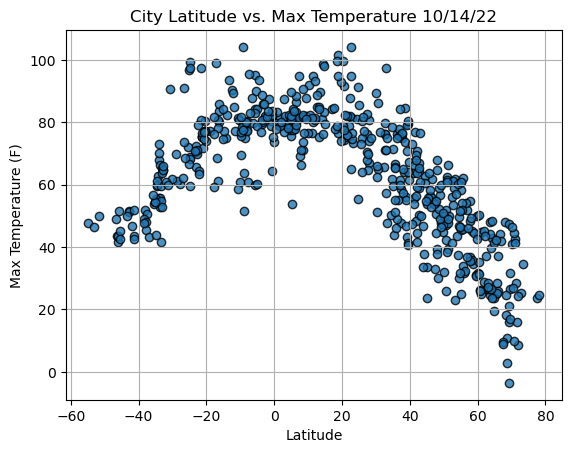

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

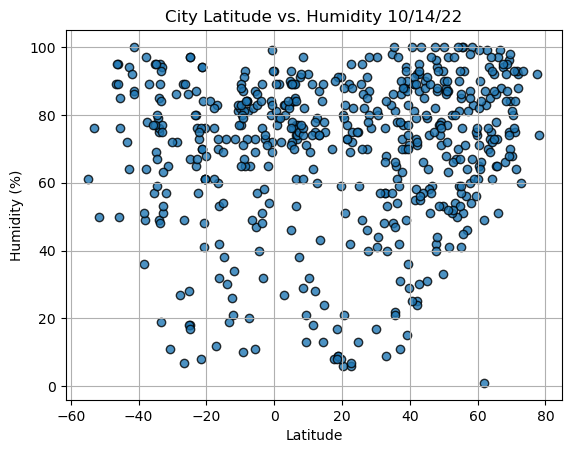

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

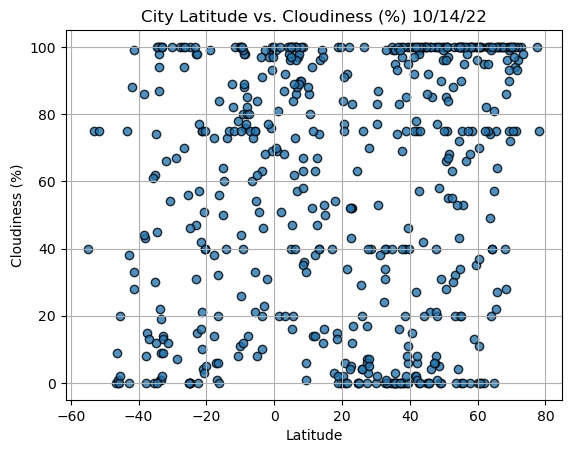

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

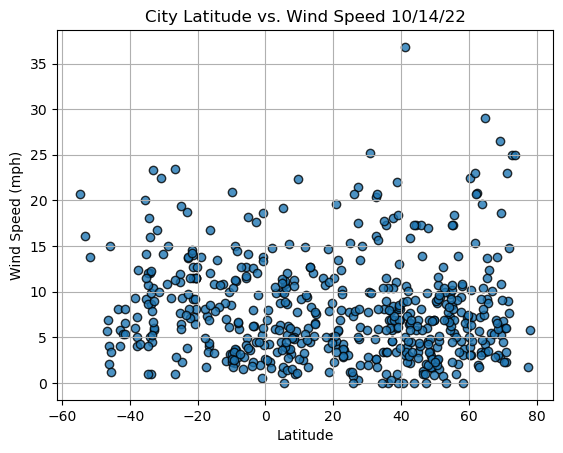

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [25]:
# To access a group of rows and columns in the DataFrame by an index label.
# This case - row # 13 
index13 = city_data_df.loc[13]

In [30]:
# To pull data latitudes greated than or eaqual to 0.
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
541     True
542    False
543     True
544    False
545     True
Name: Lat, Length: 546, dtype: bool

In [26]:
# or Use the loc method and see to get the first five rows. 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Zlotow,PL,2022-10-14 12:02:25,53.3635,17.0408,61.77,54,32,8.66
5,Riyadh,SA,2022-10-14 12:02:25,24.6877,46.7219,91.38,13,0,7.78
6,Guerrero Negro,MX,2022-10-14 12:02:26,27.9769,-114.0611,67.12,80,70,13.44
7,Albany,US,2022-10-14 12:00:50,42.6001,-73.9662,50.41,95,99,2.13
10,Luyang,CN,2022-10-14 12:02:28,27.6239,110.0989,64.69,40,3,4.85


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

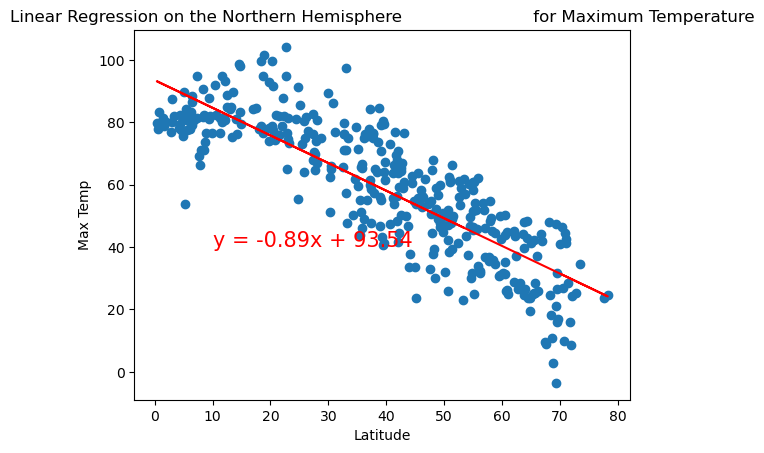

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

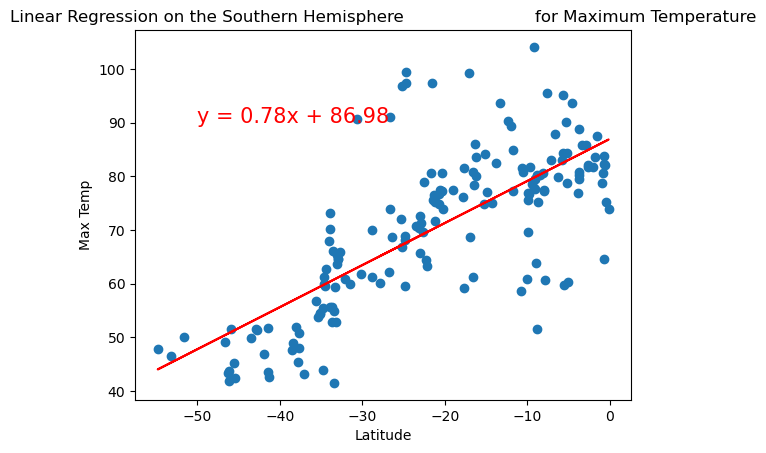

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

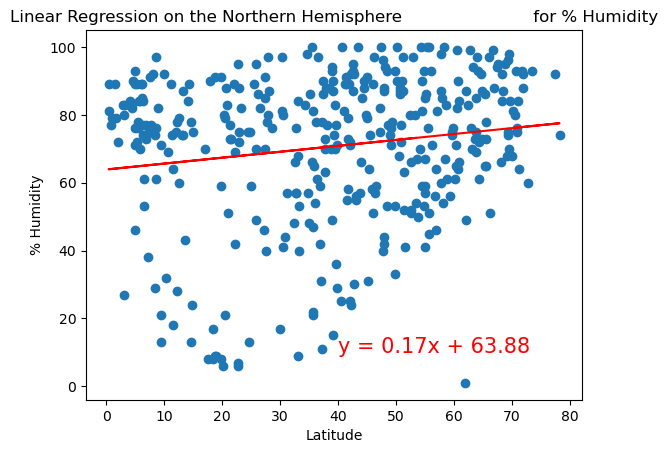

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

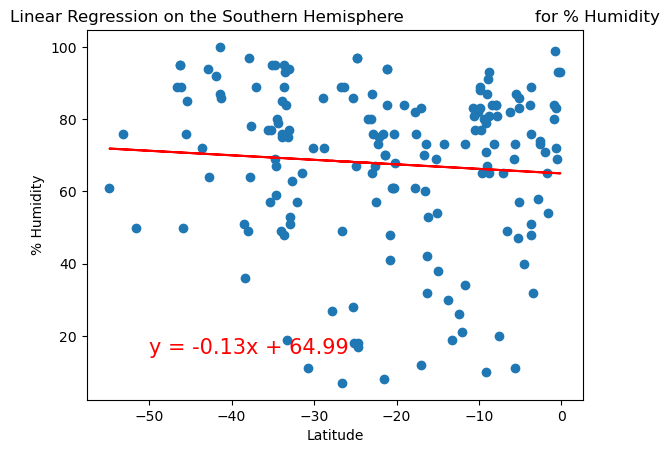

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

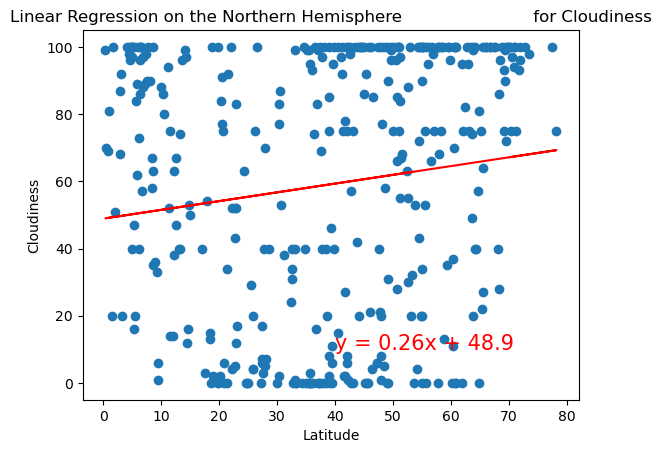

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

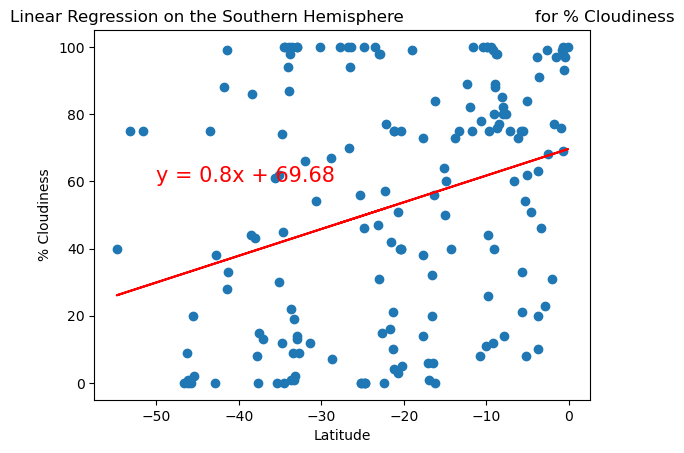

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

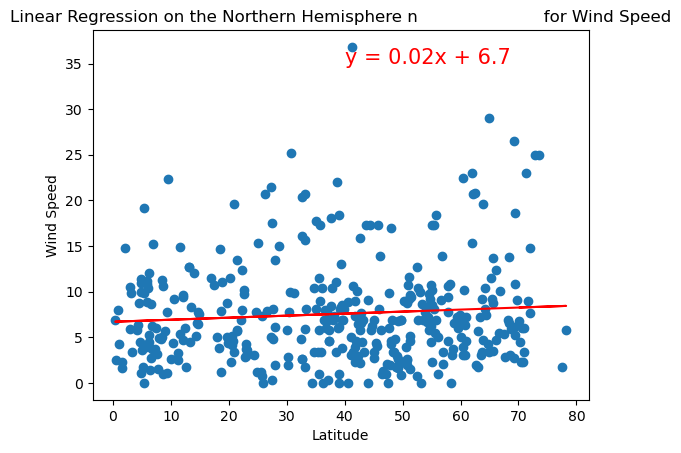

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere n\
                        for Wind Speed', 'Wind Speed',(40,35))

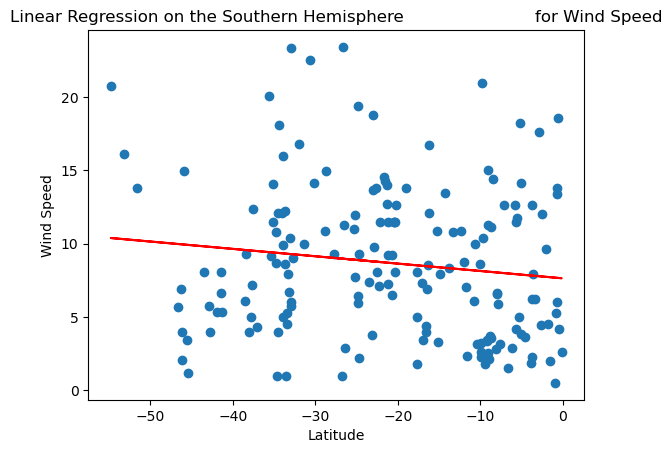

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))